## 1 資料
以下為本次進度報告使用的資料簡介及預處理


### 1.1 資料簡介
1. 來源: 由 [CWB Observation Inquire System](https://e-service.cwb.gov.tw/HistoryDataQuery/index.jsp) 爬取之時雨量
2. 期間: 2015/01/01-2018/12/31
3. 台北區共16個測站，以下是各站站碼及站名

In [2]:
station = read.csv("D:/self_practice/Data/station/station_581.csv", header = T)
station[station$cityID == 19, c(1:2)]

,ID,Station
,<fct>,<fct>
4,466910,鞍部
5,466920,臺北
6,466930,竹子湖
51,C0A980,社子
52,C0A9A0,大直
53,C0A9B0,石牌
54,C0A9C0,天母
55,C0A9E0,士林
56,C0A9F0,內湖


### 1.2 資料預處理

特殊符號整理
 1. `T`=0
 2. `X`=NA
 3. `...`=NA
 
依降雨類型切割時間
 1. 5-6月歸類為梅雨，命名為`df.meiyu`，此次報告以此data frame為例示範
 2. 11-4月歸類為鋒面雨，命名為`df.front`
 3. 7-10月歸類為對流雨及氣旋降雨，命名為`df.conv_typ`

In [3]:
df.meiyu <- read.csv('D:/self_practice/Data/precp/precp_taipei_Meiyu.csv', header = T)

## 2 Outlier 計算及作圖
### 2.1 Histogram
以鞍部站為例，下面的histogram為去掉0所畫

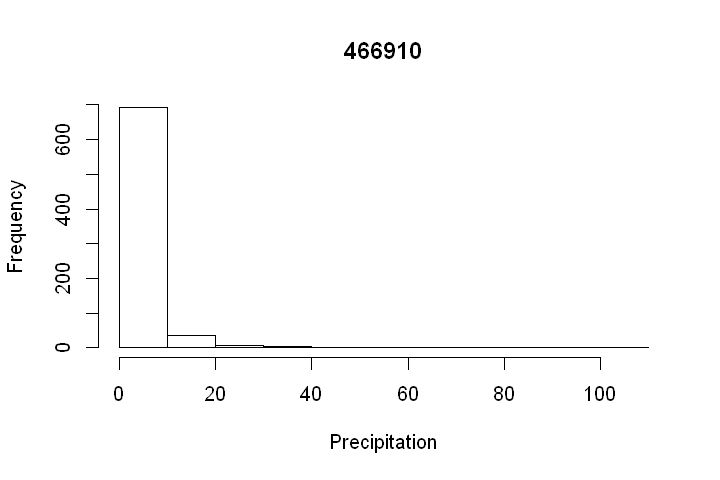

In [9]:
options(repr.plot.width=6, repr.plot.height=4)
x <- as.numeric(df.meiyu$X466910)
x2 <- x[!x %in% 0]
hist(x2, main='466910', xlab = 'Precipitation')

### 2.2 Boxplot

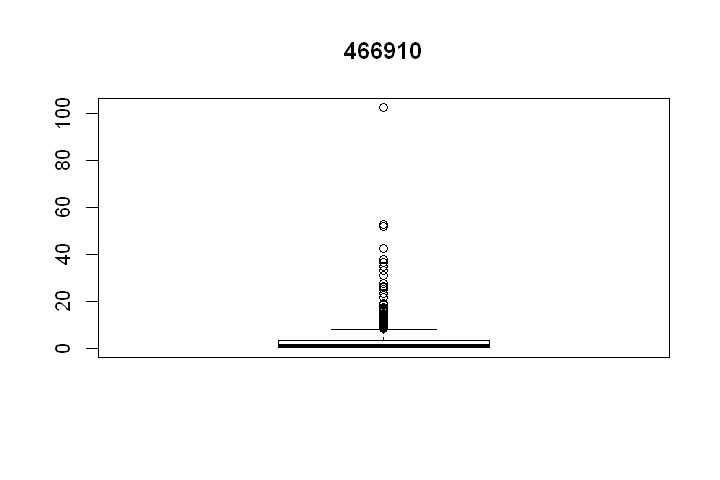

In [10]:
boxplot(x2, main='466910')

### 2.3 Outliers

`outlier`函數計算兩種 outliers:
1. Mild Outliers: 超過$Q_3+1.5IQR$ 的值
2. Extreme Outliers: 超過$Q_3+3IQR$ 的值

此函數目前只能找異常高的降雨量

In [11]:
outlier <- function(vec){
  vec <- as.numeric(vec)
  x <- vec[!vec %in% 0]
  q1 <- quantile(x, 0.25); q2 <- quantile(x, 0.5); q3 <- quantile(x, 0.75)
  iqr <- IQR(x)
  x.mild <- x[x > q3+1.5*iqr]       ; x.extreme <- x[x > q3+3*iqr]
  ind.mild <- which(vec %in% x.mild); ind.extreme <- which(vec %in% x.extreme) 
  result <- list('MildOutlier'=x.mild, 'ExtremeOutlier'=x.extreme, 'MildIndex'=ind.mild, 'ExtremeIndex'=ind.extreme)
  return(result)
}

In [12]:
res <- outlier(df.meiyu$X466910)
res$MildOutlier
res$ExtremeOutlier

[1]  12.1  36.5   8.8  16.5   9.5   8.4   9.5  15.0   9.4  12.8   8.7  12.5
[13]  17.0  10.7   8.5  15.0  14.5  11.5   8.5  13.9  23.5  25.0  13.0  19.0
[25]   9.5   9.0   9.5  14.0  11.0  16.5  21.5  14.0  16.0  10.5   9.0  13.5
[37]  17.5  26.0  11.0   9.5   9.0  11.5   9.5   8.5  38.0  42.5  27.5  53.0
[49]  26.5 102.5  35.0  12.0  11.0  10.5  52.0  33.0  31.0  25.0   9.5  11.0
[61]   9.0  10.0  15.5  15.0  19.0  12.5  16.5  15.0  10.5  18.5  10.0   8.5
[73]   8.5  12.5  11.5   9.0   9.5

[1]  36.5  16.5  15.0  12.8  17.0  15.0  14.5  13.9  23.5  25.0  13.0  19.0
[13]  14.0  16.5  21.5  14.0  16.0  13.5  17.5  26.0  38.0  42.5  27.5  53.0
[25]  26.5 102.5  35.0  52.0  33.0  31.0  25.0  15.5  15.0  19.0  16.5  15.0
[37]  18.5

對應 Extreme Outliers 的時間如下:

In [13]:
df.meiyu$Time[res$ExtremeIndex]

[1] 2015/5/12 03:00 2015/5/20 17:00 2015/5/24 04:00 2015/5/24 06:00
 [5] 2015/6/24 15:00 2016/5/10 23:00 2016/5/11 00:00 2016/5/23 15:00
 [9] 2016/6/2 08:00  2016/6/2 09:00  2016/6/2 10:00  2016/6/2 11:00 
[13] 2016/6/13 04:00 2016/6/13 06:00 2016/6/13 07:00 2016/6/14 10:00
[17] 2016/6/14 11:00 2016/6/17 17:00 2016/6/29 17:00 2016/6/29 18:00
[21] 2017/6/2 03:00  2017/6/2 04:00  2017/6/2 05:00  2017/6/2 06:00 
[25] 2017/6/2 09:00  2017/6/2 10:00  2017/6/2 11:00  2017/6/3 16:00 
[29] 2017/6/3 17:00  2017/6/3 18:00  2017/6/4 05:00  2017/6/13 16:00
[33] 2017/6/14 07:00 2017/6/14 08:00 2017/6/14 10:00 2017/6/14 11:00
[37] 2017/6/14 14:00
5856 Levels: 2015/5/1 00:00 2015/5/1 01:00 2015/5/1 02:00 ... 2018/6/9 23:00

## 3. 計算鄰近10站的相關係數矩陣

### 3.1 找出鄰近10站
一樣以`鞍部`站為例，試圖找出在台北16站中距離其最近的10站

In [15]:
options(warn=-1)
library(sp)
library(rgeos)

In [17]:
df.taipei <- station[station$cityID == 19, ]
position <- df.taipei[, 4:5]                 # Longitude and Latitude 
coordinates(position) <- ~Longitude+Latitude
d <- gDistance(position, byid = T)           # Distance 
d.min <- apply(d, 1, function(x) order(x, decreasing = F)[2:11]) # The 10 closest stations
colnames(d.min) <- df.taipei$ID

`d.min.st_name`列出距每一站最近的前10站(由上而下排序)

In [25]:
d.min.st_name <- apply(d.min, 2, function(y) df.taipei$Station[y]) 
d.min.st_id <- apply(d.min, 2, function(y) df.taipei$ID[y])
colnames(d.min.st_name) <- df.taipei$Station
d.min.st_name

鞍部,臺北,竹子湖,社子,大直,石牌,天母,士林,內湖,大屯山,信義,文山,平等,松山,公館,關渡
大屯山,公館,鞍部,關渡,松山,天母,石牌,石牌,大直,鞍部,松山,信義,天母,信義,臺北,社子
竹子湖,松山,大屯山,士林,內湖,士林,大直,社子,松山,竹子湖,公館,公館,竹子湖,大直,信義,石牌
天母,大直,天母,石牌,天母,社子,平等,大直,信義,石牌,文山,松山,內湖,公館,松山,士林
石牌,信義,平等,天母,士林,關渡,士林,天母,平等,天母,內湖,臺北,大直,臺北,文山,大屯山
平等,士林,石牌,大直,信義,大直,竹子湖,臺北,天母,關渡,大直,內湖,石牌,內湖,大直,天母
關渡,文山,關渡,大屯山,石牌,竹子湖,內湖,關渡,石牌,平等,臺北,大直,鞍部,文山,內湖,鞍部
社子,內湖,士林,臺北,臺北,大屯山,大屯山,松山,士林,社子,士林,士林,大屯山,士林,士林,竹子湖
士林,石牌,大直,竹子湖,平等,平等,鞍部,內湖,臺北,士林,天母,天母,士林,天母,天母,大直
大直,天母,內湖,鞍部,公館,鞍部,社子,信義,公館,大直,平等,平等,松山,石牌,石牌,臺北
內湖,社子,社子,松山,社子,內湖,關渡,竹子湖,文山,內湖,石牌,石牌,信義,平等,社子,平等


### 3.2 相關係數矩陣
假設以上表第一欄為例，表示選擇了`鞍部`站，`d.min.st_id`為最靠近之10站的站碼(由左至右為由近至遠)

In [24]:
station.chosen <- which('466910' == colnames(d.min)) 
d.min.st_id[, station.chosen] # IDs for 10 closest stations

Nearest10 <- rbind('466910', as.matrix(d.min.st_id[, station.chosen]))
Nearest10 <- apply(Nearest10, 1, function(x){if(grepl('C',x) == T) x=x else paste0('X',x)})
Nearest10.ind <- match(Nearest10, names(df.meiyu))

[1] "C0AC40" "466930" "C0A9C0" "C0A9B0" "C0AH40" "C1AC50" "C0A980" "C0A9E0"
 [9] "C0A9A0" "C0A9F0"

接著計算相關係數矩陣$R$，$R$為$11\times11$之矩陣，最左上角為`鞍部`站

In [22]:
library(magrittr)
R <- cbind(df.meiyu[, Nearest10.ind])
R <- apply(R, 2, as.numeric) %>% cor(, use = 'pairwise.complete.obs')
R <- round(R, 4)
R[lower.tri(R)] <- NA
R

,X466910,C0AC40,X466930,C0A9C0,C0A9B0,C0AH40,C1AC50,C0A980,C0A9E0,C0A9A0,C0A9F0
X466910,1,0.9628,0.9040,0.7531,0.7527,0.8171,0.8307,0.7539,0.6236,0.5150,0.5133
C0AC40,NA,1.0000,0.9186,0.7900,0.7924,0.8714,0.8575,0.7905,0.6639,0.5425,0.5394
X466930,NA,NA,1.0000,0.8528,0.8423,0.8576,0.8769,0.8375,0.7274,0.6175,0.6208
C0A9C0,NA,NA,NA,1.0000,0.9458,0.9383,0.8483,0.8812,0.8878,0.7884,0.7468
C0A9B0,NA,NA,NA,NA,1.0000,0.8904,0.8830,0.9250,0.8786,0.7219,0.6543
C0AH40,NA,NA,NA,NA,NA,1.0000,0.8835,0.8639,0.8446,0.8302,0.7984
C1AC50,NA,NA,NA,NA,NA,NA,1.0000,0.9431,0.7918,0.6536,0.6139
C0A980,NA,NA,NA,NA,NA,NA,NA,1.0000,0.8613,0.7142,0.6545
C0A9E0,NA,NA,NA,NA,NA,NA,NA,NA,1.0000,0.8782,0.7862
C0A9A0,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.0000,0.8655


我們挖空$R$的下半部，填上計算該相關係數之樣本數，共$C^{11}_2=55$種組合，存在`comb`中

In [31]:
library(utils)
combn(Nearest10.ind, 2)
comb <- as.matrix(combn(Nearest10.ind, 2), nrow=2, ncol=55)

4,4,4,4,4,4,4,4,4,4,...,19,19,19,19,7,7,7,11,11,8
13,6,10,9,16,19,7,11,8,12,...,7,11,8,12,11,8,12,8,12,12


`Remove_NA_n`函數: 計算去除遺失值後，用以計算相關係數的樣本數

In [33]:
Remove_NA_n = function(df, comb_index){
  x <- as.numeric(df[, comb_index[1]])
  y <- as.numeric(df[, comb_index[2]])
  x_NA_ind <- which(is.na(df[, comb_index[1]]))
  y_NA_ind <- which(is.na(df[, comb_index[2]]))
  n <- length(x[-c(x_NA_ind, y_NA_ind)])
#   print(names(df)[c(comb_index[1], comb_index[2])])
  if(n == 0) n.res <- dim(as.matrix(df))[1] else n.res <- n
  return(n.res)
}

In [35]:
SampleSize <- apply(comb, 2, function(x) Remove_NA_n(df = df.meiyu, x))
R[lower.tri(R)] <- SampleSize
colnames(R) <- c('鞍部', d.min.st_name[, 1])
R

,鞍部,大屯山,竹子湖,天母,石牌,平等,關渡,社子,士林,大直,內湖
X466910,1,0.9628,0.9040,0.7531,0.7527,0.8171,0.8307,0.7539,0.6236,0.5150,0.5133
C0AC40,5634,1.0000,0.9186,0.7900,0.7924,0.8714,0.8575,0.7905,0.6639,0.5425,0.5394
X466930,5856,5634.0000,1.0000,0.8528,0.8423,0.8576,0.8769,0.8375,0.7274,0.6175,0.6208
C0A9C0,5788,5567.0000,5788.0000,1.0000,0.9458,0.9383,0.8483,0.8812,0.8878,0.7884,0.7468
C0A9B0,5856,5634.0000,5856.0000,5788.0000,1.0000,0.8904,0.8830,0.9250,0.8786,0.7219,0.6543
C0AH40,3194,3059.0000,3194.0000,3180.0000,3194.0000,1.0000,0.8835,0.8639,0.8446,0.8302,0.7984
C1AC50,5805,5588.0000,5805.0000,5737.0000,5805.0000,3143.0000,1.0000,0.9431,0.7918,0.6536,0.6139
C0A980,5745,5529.0000,5745.0000,5677.0000,5745.0000,3112.0000,5694.0000,1.0000,0.8613,0.7142,0.6545
C0A9E0,5833,5611.0000,5833.0000,5765.0000,5833.0000,3171.0000,5784.0000,5722.0000,1.0000,0.8782,0.7862
C0A9A0,5824,5605.0000,5824.0000,5756.0000,5824.0000,3177.0000,5773.0000,5713.0000,5801.0000,1.0000,0.8655


上述顯示: $R$上半部為相關係數，下半部為計算相關係數的樣本數(樣本期間為5856個小時)，對應站名及站碼